In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [161]:
# Getting the data
mash_ds = pd.read_csv('Mashroom.csv', header=None)
mash_ds

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [162]:
# Label encoder: to convert the data in numbers
le = LabelEncoder()

for i in mash_ds.columns:
    mash_ds[i] = le.fit_transform(mash_ds[i])

mash_ds

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [163]:
mash_ds.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [164]:
mash_ds.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
dtype: int64

In [165]:
mash_ds.dtypes

0     int32
1     int32
2     int32
3     int32
4     int32
5     int32
6     int32
7     int32
8     int32
9     int32
10    int32
11    int32
12    int32
13    int32
14    int32
15    int32
16    int32
17    int32
18    int32
19    int32
20    int32
21    int32
22    int32
dtype: object

In [166]:
mash_ds.describe()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


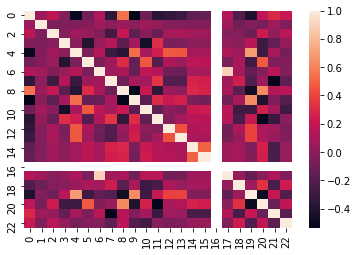

In [167]:
#Correlation between different parameter of the dataset

sns.heatmap(mash_ds.corr())
plt.show()

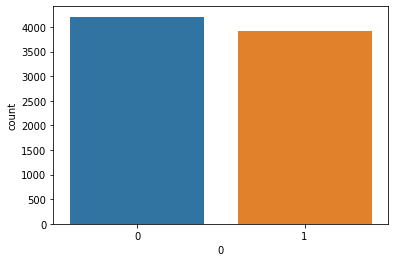

In [168]:
#CountPLot: Univariate plot: for edible and poisonous mashroom

x = mash_ds[0]
count_plt = sns.countplot(x=x)
plt.show()

In [169]:
mash_ds

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [170]:
# Removing the value which has no effect on target
for var in mash_ds.columns:
    if len(mash_ds[var].unique()) <=1:
        print (mash_ds[var].unique(), var)
        print ("\n REmoving columns which has only one value")
        
mash_ds

[0] 16

 REmoving columns which has only one value


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [171]:
mash_ds

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [172]:
x = mash_ds.iloc[:,1:]

In [173]:
x.shape

(8124, 22)

In [174]:
y = mash_ds.iloc[:,0]

In [175]:
y.shape

(8124,)

In [176]:
# Scaling the data
x = preprocessing.scale(x)

In [177]:
x.mean()

-1.017741710054304e-17

In [178]:
x.std()

0.9770084209183945

In [179]:
# For scaling the data
sc = StandardScaler()
x = sc.fit_transform(x)

In [180]:
x.shape

(8124, 22)

In [181]:
y.shape

(8124,)

In [182]:
x_train

array([[-0.21699152,  0.14012794, -0.98389939, ...,  1.42842641,
         0.28432981, -0.8771691 ],
       [-0.8403434 ,  0.14012794, -0.19824983, ...,  1.42842641,
         0.28432981, -0.8771691 ],
       [ 1.02971224,  0.95327039, -0.59107461, ..., -0.2504706 ,
         0.28432981, -0.8771691 ],
       ...,
       [-2.08704716,  0.95327039,  1.76587407, ..., -0.67019486,
        -1.31310821,  0.86714922],
       [ 1.02971224,  0.14012794,  1.37304929, ..., -0.2504706 ,
        -0.5143892 ,  0.86714922],
       [ 1.02971224,  0.14012794, -0.59107461, ..., -0.2504706 ,
        -2.91054623, -0.29572966]])

In [183]:
y_train

7735    1
6819    1
2493    0
3296    0
707     0
       ..
5242    1
51      0
631     0
828     0
1044    0
Name: 0, Length: 6499, dtype: int32

In [184]:
x_test

array([[ 1.02971224,  0.95327039, -0.98389939, ...,  1.42842641,
         0.28432981,  1.44858865],
       [ 1.02971224,  0.14012794, -0.19824983, ..., -0.67019486,
        -0.5143892 , -0.29572966],
       [ 1.02971224,  0.95327039,  1.37304929, ..., -0.2504706 ,
        -1.31310821,  0.86714922],
       ...,
       [-0.8403434 , -1.48615695, -0.19824983, ..., -0.67019486,
        -0.5143892 , -0.29572966],
       [-0.8403434 , -1.48615695, -0.19824983, ..., -0.67019486,
         1.08304882, -0.8771691 ],
       [-0.8403434 , -1.48615695, -0.98389939, ..., -0.67019486,
         1.08304882, -0.8771691 ]])

In [185]:
y_test

6190    1
1195    1
876     0
2416    0
2703    0
       ..
3630    1
2190    0
2094    0
2696    0
3502    0
Name: 0, Length: 1625, dtype: int32

In [186]:
x_train.shape

(6499, 22)

In [187]:
y_train.shape

(6499,)

In [188]:
x_test.shape

(1625, 22)

In [189]:
y_test.shape

(1625,)

In [190]:
# Using loop to select best random state
max_scr = 0
for i in range (42, 100):
    x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=.20, random_state=i)
    # Using Logistic Regression for classification
    lr = LogisticRegression()
    lr.fit(x_train, y_train)
    scr = lr.score(x_train, y_train)
    pred = lr.predict(x_test)
    
    if (scr > max_scr):
        max_scr = scr
        final_r_state = i

print ("\nmax core corresponding to :", final_r_state, "is ", max_scr)
    



max core corresponding to : 66 is  0.963378981381751


In [191]:
# Cross val score will be usec to check if the score we got is genuine or its biased
cross_val_scr = cross_val_score (lr, x, y, cv=50, scoring='accuracy').mean()
cross_val_scr

0.9512868287510414

In [192]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=66, test_size=.20)
lg = LogisticRegression()
lg.fit(x_train, y_train)
scr = lg.score(x_train, y_train)
pred = lg.predict(x_test)
cm = confusion_matrix(y_test, pred)
print ("Accuracy_score: ", accuracy_score(y_test, pred))
print ("Classification_Report : \n", classification_report(y_test, pred))
print ("Confusion matrix: ", confusion_matrix(y_test, pred))

Accuracy_score:  0.9513846153846154
Classification_Report : 
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       817
           1       0.96      0.95      0.95       808

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625

Confusion matrix:  [[782  35]
 [ 44 764]]


[0.         0.04283966 1.        ] [0.         0.94554455 1.        ] [2 1 0]
RUC_AUC_Score:  0.9513524485863519
ROC_AUC score 95.13524485863519





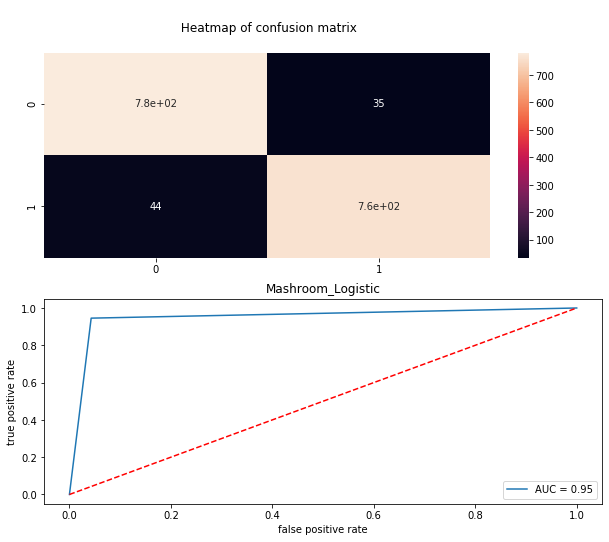

In [193]:
# roc_curve
fpr, tpr, thresholds = roc_curve(y_test, pred)                                    
print (fpr, tpr, thresholds)
roc_auc = auc(fpr, tpr)
print ('RUC_AUC_Score: ', roc_auc)

print ("ROC_AUC score", roc_auc*100)
    
plt.figure(figsize=(10, 40))
plt.subplot(911)
plt.title("\n Heatmap of confusion matrix\n")
sns.heatmap(cm, annot=True)
    
plt.subplot(912)
plt.title('Mashroom_Logistic')
plt.plot(fpr, tpr, label='AUC = %0.2f'%(roc_auc))
    
plt.plot([0,1], [0,1], 'r--')
plt.legend(loc='lower right')
plt.ylabel('true positive rate')
plt.xlabel('false positive rate')
print ('\n\n')

In [195]:
import joblib

In [196]:
joblib.dump(lg, 'Mashroom_result.joblib')

['Mashroom_result.joblib']

In [197]:
clf = joblib.load('Mashroom_result.joblib')
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [194]:
# 